In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

## Predictive Maintenance Dataset

In [2]:
# Predictive maintenance dataset
predictive_maintenance = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv')

# Drops columns with strings
predictive_maintenance = predictive_maintenance.drop(columns = ['UDI', 'Product ID'])

# One hot encoding categorical features
encoder = OneHotEncoder().fit(predictive_maintenance[['Type']])
encoder.categories_

transformed = encoder.transform(predictive_maintenance[['Type']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    predictive_maintenance[category] = transformed[:,index] 

predictive_maintenance = predictive_maintenance.drop(columns = ['Type'])

cols = predictive_maintenance.columns.tolist()
cols = cols[-3:] + cols[:-3]
predictive_maintenance = predictive_maintenance[cols]

predictive_maintenance

,H,L,M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.0,0.0,1.0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0.0,1.0,0.0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0.0,1.0,0.0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0.0,1.0,0.0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0.0,1.0,0.0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,1.0,0.0,0.0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,0.0,0.0,1.0,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,1.0,0.0,0.0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
# Stores value of Machine Failure in Y and everything else in X
X_p = predictive_maintenance.drop(['Machine failure'], axis=1)
Y_p = predictive_maintenance['Machine failure']

# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 1)

In [ ]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [5]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

99.5

In [6]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4824    6]
 [  19  151]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4830
           1       0.96      0.89      0.92       170

    accuracy                           0.99      5000
   macro avg       0.98      0.94      0.96      5000
weighted avg       0.99      0.99      0.99      5000



In [7]:
best_model.cv_results_

{'mean_fit_time': array([0.0722775 , 0.07678294, 0.10190635, 0.14366698, 0.6832468 ,
        0.09666481, 0.10209742, 0.08561082, 0.13927946, 0.70053458,
        0.21373138, 0.12478409, 0.11512113, 0.1708765 , 0.63513722,
        0.48440609, 0.24482946, 0.28182397, 0.19859138, 0.63474989]),
 'std_fit_time': array([0.00961846, 0.00519339, 0.0106192 , 0.00829659, 0.03924709,
        0.0064502 , 0.011179  , 0.00523201, 0.00617318, 0.02593152,
        0.08452132, 0.02520504, 0.01131429, 0.00619862, 0.08772689,
        0.32777776, 0.03187578, 0.02937342, 0.03017877, 0.0765281 ]),
 'mean_score_time': array([0.01733932, 0.01672044, 0.02329831, 0.0382823 , 0.12471266,
        0.01583467, 0.01714196, 0.016993  , 0.03235126, 0.12063498,
        0.0161984 , 0.01659398, 0.01674891, 0.02940016, 0.12035503,
        0.01850061, 0.01590571, 0.01308446, 0.02531438, 0.12100348]),
 'std_score_time': array([0.0015678 , 0.00054426, 0.00470065, 0.00350098, 0.00585272,
        0.0005511 , 0.00118116, 0.000536

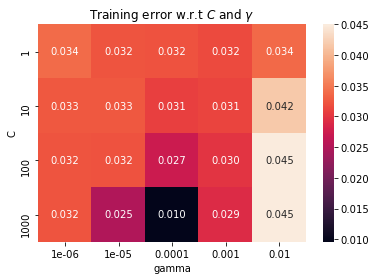

In [8]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [9]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# test set evaluation
opt_classifier.fit(X_train,Y_train)

# turns accuracy into misclassification error
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) 
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 


Test set error for optimum classifier(C=1000,gamma=0.0001): 0.005


In [10]:
# Gets another 50000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 2)

In [11]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [12]:
# Predicts the output
X_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, X_pred))*100
accuracy

99.14

In [13]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4684  152]
 [ 159    5]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4836
           1       0.03      0.03      0.03       164

    accuracy                           0.94      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.94      0.94      0.94      5000



In [14]:
best_model.cv_results_

{'mean_fit_time': array([0.06220174, 0.07201004, 0.09236641, 0.15777497, 0.7169569 ,
        0.0898777 , 0.08730912, 0.088694  , 0.16134391, 0.69384508,
        0.15181193, 0.10338101, 0.11953144, 0.18511806, 0.68113537,
        0.19626508, 0.2187397 , 0.34827628, 0.14340625, 0.62848759]),
 'std_fit_time': array([0.00368062, 0.0074699 , 0.01329877, 0.00307947, 0.0627836 ,
        0.00651998, 0.00435668, 0.00307627, 0.01118721, 0.11699405,
        0.02510404, 0.0036652 , 0.00665975, 0.00804999, 0.10097598,
        0.02599951, 0.04563391, 0.04872494, 0.00771532, 0.07374973]),
 'mean_score_time': array([0.01584487, 0.01641779, 0.02022672, 0.0368454 , 0.1317728 ,
        0.01632881, 0.01691313, 0.01725049, 0.03323016, 0.123384  ,
        0.01748157, 0.01583724, 0.01660523, 0.02979913, 0.13068852,
        0.01729498, 0.0159266 , 0.01342859, 0.01800532, 0.11962008]),
 'std_score_time': array([0.00038857, 0.00146744, 0.00133613, 0.00050694, 0.00587508,
        0.00039669, 0.00207153, 0.000317

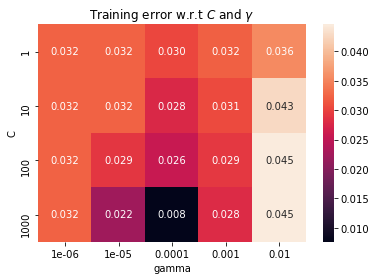

In [15]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [16]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1000,gamma=0.0001): 0.009


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 3)

In [18]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [19]:
# Predicts the output
X_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, X_pred))*100
accuracy

99.44

In [20]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4682  155]
 [ 161    2]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4837
           1       0.01      0.01      0.01       163

    accuracy                           0.94      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.94      0.94      0.94      5000



In [21]:
best_model.cv_results_

{'mean_fit_time': array([0.06215534, 0.07348247, 0.09225869, 0.140099  , 0.65411463,
        0.10312452, 0.12249012, 0.09157252, 0.15625801, 0.69591355,
        0.16294789, 0.12067833, 0.11045752, 0.17605886, 0.70787382,
        0.33580441, 0.22561007, 0.32709041, 0.15727458, 0.6910934 ]),
 'std_fit_time': array([0.00507032, 0.00496708, 0.00623232, 0.00891206, 0.00916128,
        0.01226371, 0.00980269, 0.00636755, 0.00207436, 0.06861626,
        0.02928787, 0.01370038, 0.00453286, 0.00932049, 0.08669549,
        0.09794845, 0.04116143, 0.04129567, 0.03535868, 0.06117772]),
 'mean_score_time': array([0.01643653, 0.01699724, 0.01907625, 0.03460155, 0.12363105,
        0.01796274, 0.01752882, 0.0180613 , 0.03405333, 0.11829863,
        0.01572323, 0.01823773, 0.01704512, 0.02784204, 0.11871271,
        0.01624131, 0.01639442, 0.01362824, 0.02031951, 0.1174058 ]),
 'std_score_time': array([0.00047347, 0.00089471, 0.00024511, 0.00110237, 0.00384769,
        0.00156268, 0.00036906, 0.000361

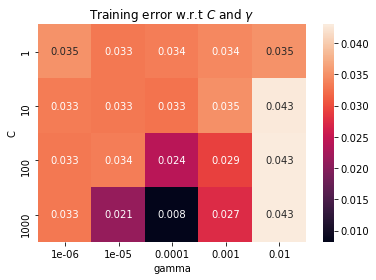

In [22]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [23]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}')

Test set error for optimum classifier(C=1000,gamma=0.0001): 0.006


In [24]:
# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 4)

In [25]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [26]:
# Predicts the output
X_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, X_pred))*100
accuracy

99.38

In [27]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4677  153]
 [ 166    4]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4830
           1       0.03      0.02      0.02       170

    accuracy                           0.94      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.93      0.94      0.93      5000



In [28]:
best_model.cv_results_

{'mean_fit_time': array([0.06164885, 0.07175055, 0.08835497, 0.16287389, 0.65889244,
        0.07912607, 0.08167777, 0.08570333, 0.14560513, 0.66501603,
        0.1171432 , 0.09376688, 0.10471182, 0.17276683, 0.65868773,
        0.18864965, 0.23254757, 0.28548412, 0.13338842, 0.64957242]),
 'std_fit_time': array([0.00326932, 0.00324774, 0.002846  , 0.01083085, 0.01476368,
        0.00652746, 0.00560528, 0.00358592, 0.00471696, 0.02441891,
        0.01449702, 0.00847462, 0.00526484, 0.00414897, 0.01359287,
        0.03129969, 0.02527895, 0.03051733, 0.00852328, 0.01595031]),
 'mean_score_time': array([0.01659241, 0.01667433, 0.0201293 , 0.03876948, 0.13139405,
        0.01590581, 0.01676779, 0.01776853, 0.03405991, 0.12354326,
        0.0156044 , 0.01537251, 0.01593227, 0.02924199, 0.1159997 ,
        0.01520143, 0.01535125, 0.01444168, 0.01741509, 0.11478481]),
 'std_score_time': array([0.00079662, 0.00057539, 0.00056909, 0.00107623, 0.00420294,
        0.00021182, 0.00122392, 0.000632

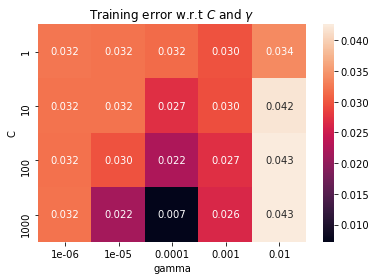

In [29]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [30]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}')

Test set error for optimum classifier(C=1000,gamma=0.0001): 0.006


In [31]:
# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, train_size = 5000, random_state = 5)

In [32]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [33]:
# Predicts the output
X_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, X_pred))*100
accuracy

99.36

In [34]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4664  151]
 [ 179    6]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4815
           1       0.04      0.03      0.04       185

    accuracy                           0.93      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.93      0.93      0.93      5000



In [35]:
best_model.cv_results_

{'mean_fit_time': array([0.05189137, 0.06591334, 0.07602348, 0.14329543, 0.64482532,
        0.08532672, 0.07886877, 0.08203278, 0.15291123, 0.68081293,
        0.15575986, 0.08756528, 0.11101556, 0.18329539, 0.67066412,
        0.35661368, 0.19296017, 0.28222928, 0.15581484, 0.66909556]),
 'std_fit_time': array([0.00314675, 0.00415605, 0.00456107, 0.01045751, 0.02070159,
        0.00461486, 0.00507874, 0.00343723, 0.01054924, 0.02234172,
        0.01435483, 0.00698464, 0.0087171 , 0.01019766, 0.0156631 ,
        0.08716113, 0.0252229 , 0.02816903, 0.03763533, 0.01021203]),
 'mean_score_time': array([0.01360145, 0.01451221, 0.01775603, 0.03591685, 0.12597737,
        0.0156354 , 0.01451249, 0.01598167, 0.03413606, 0.11790266,
        0.01567855, 0.01368251, 0.01608491, 0.03052063, 0.11829824,
        0.01404529, 0.01416478, 0.01419697, 0.02152233, 0.11471519]),
 'std_score_time': array([0.00022939, 0.00079164, 0.00122468, 0.00247367, 0.00618235,
        0.0005766 , 0.0003587 , 0.000422

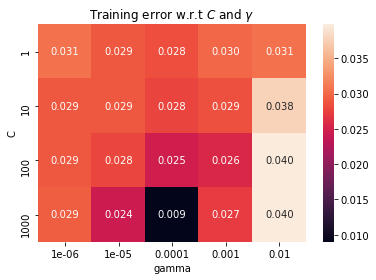

In [36]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [37]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}')

Test set error for optimum classifier(C=1000,gamma=0.0001): 0.006


## Nursery Dataset

In [38]:
# Nursery dataset
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

# One hot encoding categorical features
encoder = OneHotEncoder().fit(nursery[['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1', 'nonprob', 'recommended', 'recommend']])
encoder.categories_

transformed = encoder.transform(nursery[['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1', 'nonprob', 'recommended', 'recommend']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    nursery[category] = transformed[:,index]

# Drops columns with string
nursery = nursery.drop(columns = ['convenient.1'])

nursery

,usual,proper,complete,1,convenient,nonprob,recommended,recommend,great_pret,pretentious,...,3,more,less_conv,inconv,problematic,slightly_prob,not_recom,priority,spec_prior,very_recom
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
12955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
12956,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
12957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X_n = nursery.drop(['recommended'], axis=1) 
Y_n = nursery['recommended']

# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 1)

In [40]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [43]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

75.42404824726724

In [44]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4574  756]
 [1200 1429]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      5330
         1.0       0.65      0.54      0.59      2629

    accuracy                           0.75      7959
   macro avg       0.72      0.70      0.71      7959
weighted avg       0.75      0.75      0.75      7959



In [45]:
best_model.cv_results_

{'mean_fit_time': array([0.56907392, 0.58513598, 0.56002727, 0.55515685, 0.58859758,
        0.56567221, 0.56734118, 0.56911974, 0.66828647, 0.51072426,
        0.58330102, 0.55432148, 0.57886729, 0.50929332, 0.5506784 ,
        0.63379946, 0.7123487 , 0.50204425, 0.56676159, 1.09146142]),
 'std_fit_time': array([0.01243157, 0.02693649, 0.01917255, 0.0150967 , 0.02893144,
        0.02284177, 0.034116  , 0.01461163, 0.03799732, 0.02592765,
        0.02018102, 0.01860652, 0.05602244, 0.03370341, 0.02171414,
        0.02789071, 0.03315251, 0.01362837, 0.02494609, 0.02721753]),
 'mean_score_time': array([0.15615644, 0.15821009, 0.15646815, 0.15518889, 0.13854499,
        0.15838156, 0.15667691, 0.15902886, 0.14303889, 0.12995768,
        0.16518192, 0.15256801, 0.14701309, 0.12447233, 0.11540661,
        0.16162562, 0.13926163, 0.1282496 , 0.12061753, 0.11071768]),
 'std_score_time': array([0.00419213, 0.00386171, 0.0029703 , 0.00253942, 0.00233289,
        0.00537388, 0.00493648, 0.004635

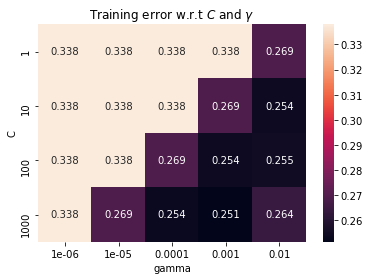

In [46]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [47]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1000,gamma=0.001): 0.246


In [48]:
# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 2)

In [49]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [50]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

75.41148385475563

In [51]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4362  950]
 [1007 1640]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      5312
         1.0       0.63      0.62      0.63      2647

    accuracy                           0.75      7959
   macro avg       0.72      0.72      0.72      7959
weighted avg       0.75      0.75      0.75      7959



In [52]:
best_model.cv_results_

{'mean_fit_time': array([2.0276669 , 1.83191457, 2.66263366, 2.24413075, 2.15696483,
        2.18060064, 2.17645135, 1.94132028, 2.13750682, 2.08674431,
        2.20107512, 3.25984674, 2.31015549, 2.11741104, 1.58208332,
        2.71027126, 2.40104671, 1.91021714, 2.09159923, 4.21151681]),
 'std_fit_time': array([1.15344122, 1.00965402, 1.01451515, 1.4791135 , 1.24649668,
        1.32624845, 1.43140486, 1.11813801, 1.72002899, 1.30083631,
        1.34351801, 1.73941983, 1.37941166, 1.32961825, 1.25982754,
        1.05770104, 0.85049984, 1.13195466, 1.20610106, 1.21355153]),
 'mean_score_time': array([0.59238243, 0.72952876, 0.16505103, 0.60429568, 0.60700893,
        0.52047725, 0.16258516, 0.68173957, 1.13151445, 0.6356657 ,
        0.15689592, 0.17597966, 0.67440472, 0.13382821, 0.60370903,
        0.16400504, 0.7518014 , 0.13107586, 0.12291903, 0.1247026 ]),
 'std_score_time': array([0.83322087, 1.11622481, 0.00819984, 0.87196269, 0.92776941,
        0.69002642, 0.00771554, 1.042556

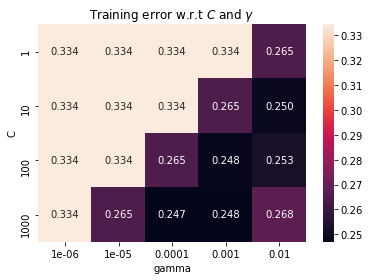

In [53]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [54]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1000,gamma=0.0001): 0.246


In [55]:
# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 3)

In [56]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [57]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

75.8009800226159

In [58]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4521  790]
 [1136 1512]]
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      5311
         1.0       0.66      0.57      0.61      2648

    accuracy                           0.76      7959
   macro avg       0.73      0.71      0.72      7959
weighted avg       0.75      0.76      0.75      7959



In [59]:
best_model.cv_results_

{'mean_fit_time': array([1.80050459, 2.38945012, 2.35253854, 1.12587457, 2.09811578,
        1.53528919, 1.65949717, 1.84920454, 2.66666794, 1.85530019,
        1.06442027, 1.69671369, 1.89988217, 1.49832916, 2.05295329,
        1.53554854, 1.59616036, 1.64144473, 2.7039854 , 3.48924818]),
 'std_fit_time': array([1.5250942 , 1.52117206, 0.84101574, 1.03145241, 1.85834605,
        1.16190372, 1.28527844, 1.05968922, 1.03624351, 1.082526  ,
        0.93485191, 1.42570609, 1.72238543, 1.17464185, 1.17330721,
        1.10653846, 1.12263737, 1.30513203, 1.10904912, 0.33577594]),
 'mean_score_time': array([0.55280905, 0.16848149, 0.16358185, 1.19114599, 1.12636175,
        0.56178818, 0.69495893, 0.19661431, 0.14794183, 0.13637829,
        1.1295249 , 1.11730318, 0.61358738, 0.55737009, 0.13013229,
        0.70550132, 1.06019292, 0.13359871, 0.12545557, 0.11332192]),
 'std_score_time': array([0.77817101, 0.00686877, 0.00189346, 1.25713121, 1.20229837,
        0.79955914, 1.06597579, 0.045092

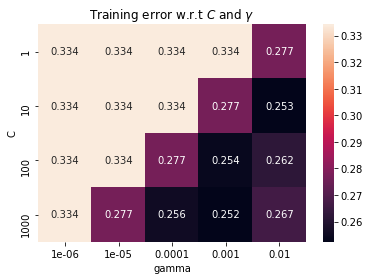

In [60]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [61]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1000,gamma=0.001): 0.242


In [62]:
# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 4)

In [63]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [64]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

75.6753360974997

In [65]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4351  920]
 [1016 1672]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      5271
         1.0       0.65      0.62      0.63      2688

    accuracy                           0.76      7959
   macro avg       0.73      0.72      0.73      7959
weighted avg       0.75      0.76      0.76      7959



In [66]:
best_model.cv_results_

{'mean_fit_time': array([1.3628264 , 2.04546123, 2.0344667 , 2.12709332, 1.75795026,
        2.60753818, 1.63294816, 1.34875956, 1.68316092, 1.55119405,
        2.04074202, 1.6131289 , 2.06403069, 1.58009763, 1.9359652 ,
        2.22420092, 2.40792818, 1.6251502 , 1.57586946, 3.01841168]),
 'std_fit_time': array([0.96896165, 1.19014881, 1.19140575, 1.2563164 , 1.3873929 ,
        1.04638712, 1.24536917, 0.96137765, 1.12331919, 1.24008926,
        1.20799028, 1.27630225, 1.19032582, 1.27490394, 1.07765473,
        1.29653039, 1.16970657, 1.3413166 , 1.14780685, 1.03180963]),
 'mean_score_time': array([0.76196184, 0.16591587, 0.67675886, 0.16447392, 0.67680774,
        0.16576676, 0.90131497, 0.75908418, 0.65510721, 0.69510465,
        0.15823817, 0.6315897 , 0.15911365, 0.58253832, 0.12785335,
        0.1605732 , 0.53455606, 0.6363698 , 0.67622561, 0.54872975]),
 'std_score_time': array([1.18654667, 0.0092477 , 0.97186821, 0.00757846, 1.05828173,
        0.00862008, 1.47661409, 1.188880

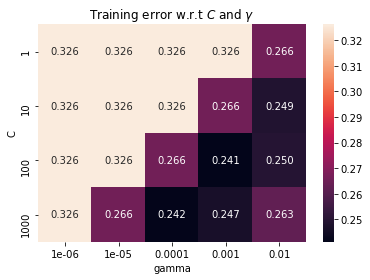

In [67]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [68]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=100,gamma=0.001): 0.243


In [69]:
# Gets another random 5000 samples
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, train_size = 5000, random_state = 5)

In [70]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [71]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

75.6250785274532

In [72]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4584  749]
 [1191 1435]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83      5333
         1.0       0.66      0.55      0.60      2626

    accuracy                           0.76      7959
   macro avg       0.73      0.70      0.71      7959
weighted avg       0.75      0.76      0.75      7959



In [73]:
best_model.cv_results_

{'mean_fit_time': array([1.90637369, 1.74823422, 1.47101498, 1.77253003, 1.59796371,
        1.72182007, 1.66782141, 1.0763319 , 1.8632678 , 0.54193764,
        1.52973008, 1.86288214, 1.69065061, 1.73322392, 1.63562303,
        1.71097941, 2.53732176, 1.51831298, 1.85176854, 3.78905396]),
 'std_fit_time': array([1.14312854, 1.45829614, 1.11881204, 1.51871517, 1.22058741,
        1.28095465, 1.30822331, 0.98154596, 1.36579198, 0.052581  ,
        1.15523935, 1.03588724, 1.27813925, 1.41437763, 1.25708368,
        1.32335956, 0.93992842, 1.19205146, 0.9870331 , 0.36335956]),
 'mean_score_time': array([0.15978947, 0.5719573 , 0.62186942, 0.16658192, 0.63497496,
        0.65553398, 0.72265682, 1.03829722, 1.09744129, 1.11293397,
        0.6622757 , 0.17371969, 0.58666658, 0.14469543, 0.60574527,
        0.57411313, 0.14812241, 0.13271213, 0.12807832, 0.12126536]),
 'std_score_time': array([0.00560459, 0.8285348 , 0.91292791, 0.00439765, 0.98244799,
        0.94060049, 1.11504735, 1.074692

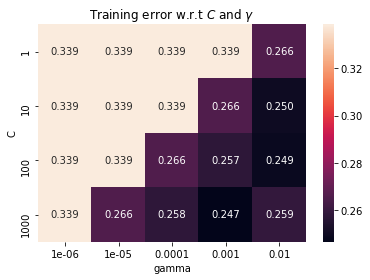

In [74]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [75]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1000,gamma=0.001): 0.244


## Electrical Grid Dataset

In [76]:
electrical_grid = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

encoder = OneHotEncoder().fit(electrical_grid[['stabf']])
encoder.categories_

transformed = encoder.transform(electrical_grid[['stabf']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    electrical_grid[category] = transformed[:,index]
    
cols = electrical_grid.columns.tolist()
cols = cols[-2:] + cols[:-2]
electrical_grid = electrical_grid[cols]

electrical_grid = electrical_grid.drop(columns = ['stabf'])
    
electrical_grid

,stable,unstable,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,0.0,1.0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,1.0,0.0,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,0.0,1.0,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.0,1.0,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,0.0,1.0,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892
9996,1.0,0.0,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803
9997,1.0,0.0,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810
9998,0.0,1.0,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789


In [77]:
# Stores all columns except Stable in X and Stable in Y
X_e = electrical_grid.drop(['stable'], axis=1)
Y_e = electrical_grid['stable']

# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 1)

In [78]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [79]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [80]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3181    0]
 [   0 1819]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3181
         1.0       1.00      1.00      1.00      1819

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [81]:
best_model.cv_results_

{'mean_fit_time': array([1.57194052, 1.53050332, 1.5758862 , 1.46907458, 1.03768387,
        2.1541862 , 1.5659791 , 1.43068295, 0.14524622, 0.62847357,
        1.7186625 , 1.70846095, 0.71992431, 0.0883595 , 0.06082091,
        1.74793153, 1.71386523, 0.85733275, 0.08851056, 0.31164212]),
 'std_fit_time': array([1.15603345, 1.13204718, 1.15749558, 1.26202891, 1.14231377,
        1.25635597, 1.1221462 , 1.1833002 , 0.01005438, 1.11922413,
        1.35495232, 1.5374889 , 0.86494528, 0.00839402, 0.0021343 ,
        1.64328705, 1.682603  , 1.23456615, 0.00781729, 0.32807792]),
 'mean_score_time': array([0.68375645, 0.17286358, 0.62034373, 0.12040987, 0.02828603,
        0.16305594, 0.63044147, 0.10765324, 0.01587057, 0.00912848,
        0.15368662, 0.56155944, 0.01804299, 0.00588183, 0.00819836,
        0.10625958, 0.02191973, 0.00651793, 0.00551777, 0.20658789]),
 'std_score_time': array([1.05721002e+00, 2.29905607e-02, 9.12821870e-01, 2.53315342e-02,
        1.44780356e-03, 6.68030295e-

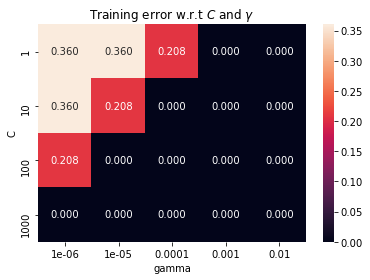

In [82]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [83]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1,gamma=0.001): 0.000


In [84]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 2)

In [85]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [86]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [87]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3194    0]
 [   0 1806]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3194
         1.0       1.00      1.00      1.00      1806

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [88]:
best_model.cv_results_

{'mean_fit_time': array([1.54069476, 1.88817086, 2.2397644 , 1.36551003, 0.56479449,
        1.7769341 , 1.73817444, 1.612884  , 0.72800984, 0.06661148,
        1.9479887 , 1.28209209, 0.68514695, 0.63034544, 0.06106229,
        1.52793388, 1.27736826, 0.72729177, 0.09181252, 0.05731583]),
 'std_fit_time': array([1.12850028, 1.04362369, 1.36166845, 1.10987779, 0.81348354,
        1.49619083, 1.39348346, 1.39025688, 1.13897333, 0.00297117,
        1.09336438, 1.55284203, 0.79287331, 1.08523073, 0.00336354,
        1.21157814, 1.10606623, 0.96231565, 0.00872523, 0.00411086]),
 'mean_score_time': array([0.16155167, 0.24463658, 0.16155009, 0.11021662, 0.02823052,
        1.49813023, 0.15880613, 0.11010017, 0.01749043, 0.00914583,
        0.16331577, 0.69720168, 0.01747732, 0.0445147 , 0.0078249 ,
        0.10807838, 0.24791307, 0.00629749, 0.00580239, 0.00812321]),
 'std_score_time': array([8.25620232e-03, 1.71268861e-01, 2.42961152e-02, 1.12871653e-02,
        8.34623670e-04, 2.65507154e+

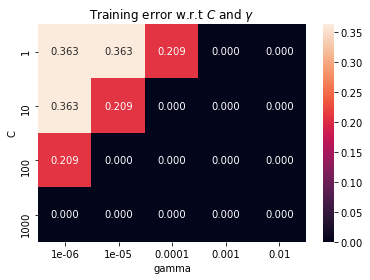

In [89]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [90]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1,gamma=0.001): 0.000


In [91]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 3)

In [92]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [93]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [94]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3203    0]
 [   0 1797]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3203
         1.0       1.00      1.00      1.00      1797

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [95]:
best_model.cv_results_

{'mean_fit_time': array([3.24279122, 1.43265061, 1.63799953, 1.40878878, 0.15718279,
        2.03745613, 1.69429631, 1.52454581, 0.67375875, 0.07292724,
        1.89593272, 1.45083742, 0.74487486, 0.48370099, 0.0693325 ,
        1.58240771, 1.91900797, 0.72764101, 0.11335034, 0.06219206]),
 'std_fit_time': array([2.37112631, 1.02183727, 1.26209951, 1.14026873, 0.00459797,
        1.1939014 , 1.3976386 , 1.3490972 , 1.06017856, 0.0035145 ,
        1.06759093, 1.13848132, 0.87755494, 0.731791  , 0.0050479 ,
        1.29801115, 2.10568098, 0.96162289, 0.02966856, 0.00248915]),
 'mean_score_time': array([0.18501086, 0.65186057, 0.67908111, 0.14230719, 0.02892876,
        0.16337709, 0.15626326, 0.1035008 , 0.01649857, 0.01057982,
        0.15308475, 0.10679884, 0.01765199, 0.07615166, 0.00854216,
        0.10721688, 0.02330508, 0.0286787 , 0.00510602, 0.00840287]),
 'std_score_time': array([4.46778487e-02, 9.67564973e-01, 1.01808960e+00, 4.81833771e-02,
        2.33766812e-03, 9.23637335e-

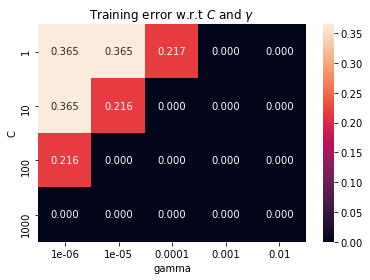

In [96]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [97]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1,gamma=0.001): 0.000


In [98]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 4)

In [99]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [100]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [101]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3200    0]
 [   0 1800]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3200
         1.0       1.00      1.00      1.00      1800

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [102]:
best_model.cv_results_

{'mean_fit_time': array([2.39165645, 1.7747416 , 1.7178328 , 1.60744328, 0.77939453,
        1.62332435, 1.4891211 , 1.52272577, 0.64957013, 0.07085714,
        1.69062099, 1.38929338, 0.83626199, 0.08973689, 0.06494069,
        1.49547076, 0.84382424, 0.68214054, 0.10628386, 0.07189565]),
 'std_fit_time': array([1.55036409, 1.35123137, 1.27835445, 1.41100927, 1.22674719,
        1.19852001, 1.06837611, 1.27299879, 0.99356366, 0.00228458,
        1.15866454, 1.13004384, 1.09006077, 0.00873365, 0.0027461 ,
        1.20342572, 0.78954011, 0.89732274, 0.03068716, 0.00766193]),
 'mean_score_time': array([0.17255964, 0.17936001, 0.80201607, 0.1078299 , 0.03024807,
        0.76769991, 0.15422497, 0.11013618, 0.0199573 , 0.00909834,
        0.66489725, 0.21327758, 0.0175683 , 0.00560117, 0.00834274,
        0.10845962, 0.4789588 , 0.00624967, 0.00609455, 0.00903392]),
 'std_score_time': array([2.68427497e-02, 3.06404789e-02, 1.28941991e+00, 4.16698452e-03,
        4.12838206e-03, 1.20911301e+

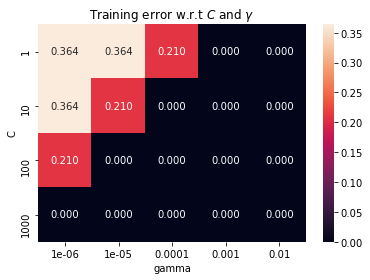

In [103]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [104]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1,gamma=0.001): 0.000


In [105]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_e, Y_e, train_size = 5000, random_state = 5)

In [106]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [107]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [108]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3207    0]
 [   0 1793]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3207
         1.0       1.00      1.00      1.00      1793

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [109]:
best_model.cv_results_

{'mean_fit_time': array([1.63573303, 1.07252355, 1.1344439 , 1.13400607, 0.18851986,
        0.62921343, 1.53836546, 1.35001993, 0.15026879, 0.06597538,
        1.69975214, 1.24109201, 0.72821307, 0.49687452, 0.06541777,
        1.69766264, 0.94451842, 0.74354405, 0.58987031, 0.06925559]),
 'std_fit_time': array([1.25866115, 0.9098482 , 1.04945401, 1.33006431, 0.04379863,
        0.01394646, 1.13367268, 1.0627755 , 0.01597224, 0.00255294,
        1.34762237, 0.93280685, 0.77965971, 0.8259976 , 0.00359189,
        1.33813665, 1.05366062, 0.97572467, 1.00151761, 0.00464472]),
 'mean_score_time': array([0.17461324, 1.11850595, 1.07359538, 0.10801988, 0.47828383,
        1.68024535, 0.1576479 , 0.11050711, 0.43432975, 0.00876513,
        0.17377172, 0.12775888, 0.01897664, 0.00505552, 0.00859394,
        0.12103877, 0.02390194, 0.00629311, 0.00532022, 0.00836148]),
 'std_score_time': array([2.41933662e-02, 1.19129694e+00, 1.13559551e+00, 3.87745925e-03,
        8.98396989e-01, 1.24273668e+

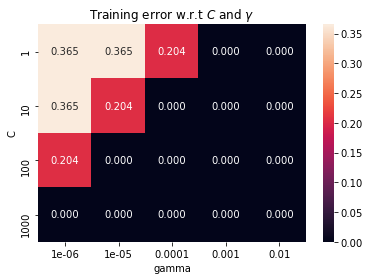

In [110]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [111]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=1,gamma=0.001): 0.000


## Chess Dataset

In [112]:
# Chess dataset
chess = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data')

# One hot encoding categorical features
encoder = OneHotEncoder().fit(chess[['draw']])
encoder.categories_

transformed = encoder.transform(chess[['draw']] ).toarray() 
transformed

for index, category in enumerate( np.concatenate(encoder.categories_) ):
    chess[category] = transformed[:,index]

# Drops strings and NaN so works in Grid Search
chess = chess.drop(columns = ['a', 'b', 'c'])
chess

,1,3,2,draw,eight,eleven,fifteen,five,four,fourteen,...,one,seven,six,sixteen,ten,thirteen,three,twelve,two,zero
0,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28050,1,7,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28051,1,7,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28052,1,7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28053,1,7,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Stores all columns except draw in X and draw in Y
X_c = chess.drop(['draw'], axis=1)
Y_c = chess['draw']

# Gets 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y_c, train_size = 5000, random_state = 1)

In [114]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [115]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [116]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20752     0]
 [    0  2303]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20752
         1.0       1.00      1.00      1.00      2303

    accuracy                           1.00     23055
   macro avg       1.00      1.00      1.00     23055
weighted avg       1.00      1.00      1.00     23055



In [117]:
best_model.cv_results_

{'mean_fit_time': array([0.11709399, 1.18495994, 0.12966075, 0.16621857, 0.16423211,
        0.59095392, 0.11594763, 0.85478315, 0.65480719, 0.09683514,
        0.11548839, 0.57827191, 0.66343813, 0.60447683, 0.05790701,
        0.5818512 , 0.84023352, 1.10388145, 0.11989985, 0.05552354]),
 'std_fit_time': array([0.01702489, 2.14431904, 0.00265709, 0.03690681, 0.04519288,
        0.94532214, 0.00515411, 1.12963894, 1.0026605 , 0.00822084,
        0.00345752, 0.75662638, 0.82362891, 0.88286224, 0.00237416,
        0.81525429, 1.05539836, 1.53909009, 0.00984913, 0.00420052]),
 'mean_score_time': array([0.03676023, 0.05712867, 0.03851242, 0.5168282 , 0.03771176,
        0.03575592, 0.0357286 , 0.04164071, 0.03855276, 0.0188992 ,
        0.118927  , 0.0425477 , 0.04343863, 0.0182601 , 0.00702353,
        0.03781056, 0.03732581, 0.01881914, 0.00748906, 0.00641212]),
 'std_score_time': array([1.50889100e-03, 3.74315763e-02, 7.85720651e-04, 9.58546964e-01,
        8.16218930e-04, 5.45286661e-

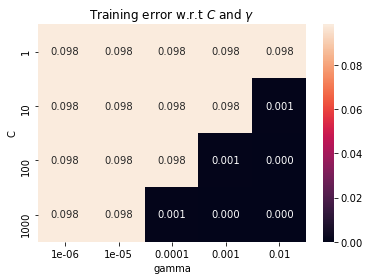

In [118]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [119]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=100,gamma=0.01): 0.000


In [120]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y_c, train_size = 5000, random_state = 2)

In [121]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [122]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [123]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20704     0]
 [    0  2351]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20704
         1.0       1.00      1.00      1.00      2351

    accuracy                           1.00     23055
   macro avg       1.00      1.00      1.00     23055
weighted avg       1.00      1.00      1.00     23055



In [124]:
best_model.cv_results_

{'mean_fit_time': array([0.1072227 , 0.11067381, 0.10878215, 0.72992821, 0.13121238,
        0.09881873, 0.09748158, 0.52237034, 0.13442588, 0.99052958,
        0.1040555 , 0.8228158 , 0.19374986, 0.92476478, 0.05549288,
        0.24269967, 0.61165128, 0.84549026, 0.15375514, 0.05300941]),
 'std_fit_time': array([0.01042081, 0.01528397, 0.00494118, 1.169898  , 0.01165663,
        0.00267375, 0.00325224, 0.73270137, 0.00282824, 1.80085008,
        0.00727281, 1.30539943, 0.00836418, 1.54998727, 0.00406215,
        0.19070118, 0.69246188, 0.96022147, 0.03333378, 0.00369476]),
 'mean_score_time': array([0.03398309, 0.40974894, 0.03514643, 0.03750567, 0.03571677,
        0.45725126, 0.03305478, 0.03582358, 0.03290763, 0.01795039,
        0.0331377 , 0.03707614, 0.0335659 , 0.01853099, 0.00680766,
        0.0368576 , 0.03467031, 0.42461967, 0.00748014, 0.00628128]),
 'std_score_time': array([2.00141053e-03, 7.50026898e-01, 1.27876343e-03, 5.17605012e-03,
        4.10983168e-03, 8.45680577e-

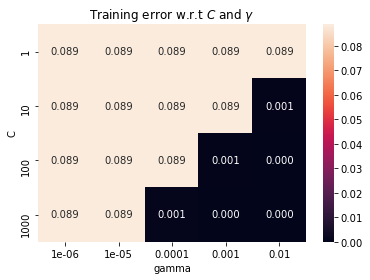

In [125]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [126]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=100,gamma=0.01): 0.000


In [127]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y_c, train_size = 5000, random_state = 3)

In [128]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [129]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [130]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20740     0]
 [    0  2315]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20740
         1.0       1.00      1.00      1.00      2315

    accuracy                           1.00     23055
   macro avg       1.00      1.00      1.00     23055
weighted avg       1.00      1.00      1.00     23055



In [131]:
best_model.cv_results_

{'mean_fit_time': array([0.10791225, 0.70632472, 0.12249823, 0.18643808, 0.13359103,
        0.5677052 , 0.14824228, 0.71416407, 0.15409284, 0.57906895,
        0.11045256, 0.7768815 , 0.62329583, 0.13956718, 0.05445681,
        0.72738066, 0.79147429, 0.76689758, 0.56721864, 0.05471444]),
 'std_fit_time': array([0.00717583, 1.2015678 , 0.00678462, 0.08525431, 0.00266864,
        0.93000718, 0.0295584 , 1.06517552, 0.00468975, 0.94708079,
        0.00504401, 1.189572  , 0.80056955, 0.00466819, 0.00337642,
        1.11267448, 0.96871054, 0.88451947, 0.86919067, 0.00476305]),
 'mean_score_time': array([0.0350955 , 0.03531237, 0.03740478, 0.49956632, 0.03646832,
        0.03521471, 0.04227509, 0.04843898, 0.03616595, 0.02373028,
        0.03776207, 0.04083233, 0.03949385, 0.01801653, 0.00671816,
        0.03743391, 0.03672848, 0.04971175, 0.00729623, 0.00664043]),
 'std_score_time': array([9.96126626e-04, 2.28753581e-03, 1.36946329e-03, 9.24829301e-01,
        3.28332956e-04, 1.18271874e-

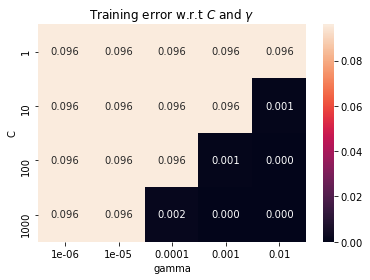

In [132]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [133]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=100,gamma=0.01): 0.000


In [134]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y_c, train_size = 5000, random_state = 4)

In [135]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [136]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [137]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20739     0]
 [    0  2316]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20739
         1.0       1.00      1.00      1.00      2316

    accuracy                           1.00     23055
   macro avg       1.00      1.00      1.00     23055
weighted avg       1.00      1.00      1.00     23055



In [138]:
best_model.cv_results_

{'mean_fit_time': array([0.71274934, 0.10700932, 0.58663983, 0.13553839, 0.71197772,
        0.11185141, 0.50872293, 0.1649837 , 0.15143695, 0.5148572 ,
        0.10957856, 0.18466458, 0.59626508, 0.14768767, 0.0553896 ,
        0.17022209, 0.81353798, 0.75985446, 0.68011303, 0.05426354]),
 'std_fit_time': array([1.20735677, 0.00424747, 0.93882525, 0.00462916, 1.15914879,
        0.00951301, 0.79998289, 0.00500534, 0.00853962, 0.81237462,
        0.00248952, 0.009651  , 0.72877796, 0.00556269, 0.00170923,
        0.00703247, 1.08956474, 0.91110944, 1.06767273, 0.00302692]),
 'mean_score_time': array([0.03977857, 0.03485842, 0.03684287, 0.03681226, 0.03764377,
        0.04375992, 0.04073339, 0.54280663, 0.0357614 , 0.06370196,
        0.03662114, 0.53776569, 0.04363818, 0.0187397 , 0.00795569,
        0.55071721, 0.03969822, 0.01915722, 0.00858846, 0.00637217]),
 'std_score_time': array([8.25716949e-03, 6.20711393e-04, 1.42191642e-03, 8.55302485e-04,
        3.04377096e-03, 1.38606685e-

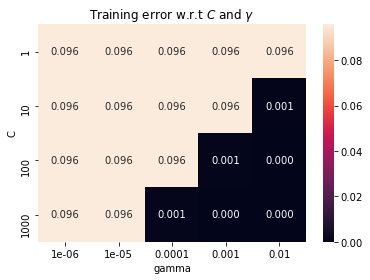

In [139]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [140]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=100,gamma=0.01): 0.000


In [141]:
# Gets another 5000 random samples
X_train, X_test, Y_train, Y_test = train_test_split(X_c, Y_c, train_size = 5000, random_state = 5)

In [142]:
classifier = svm.SVC(kernel= 'rbf')
parameters = {'C': [1, 10, 100, 1000], 'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
search_results =  GridSearchCV(classifier, parameters)

best_model = search_results.fit(X_train,Y_train)

In [143]:
# Predicts the output
Y_pred = search_results.predict(X_test)

# Displays the accuracy of the model
accuracy = (accuracy_score(Y_test, Y_pred))*100
accuracy

100.0

In [144]:
# Evaluating the algorithm
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[20751     0]
 [    0  2304]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20751
         1.0       1.00      1.00      1.00      2304

    accuracy                           1.00     23055
   macro avg       1.00      1.00      1.00     23055
weighted avg       1.00      1.00      1.00     23055



In [145]:
best_model.cv_results_

{'mean_fit_time': array([0.55074449, 0.10552816, 0.7292665 , 0.14114614, 0.14902806,
        0.10774794, 0.65155892, 0.1762403 , 0.61197462, 0.09446883,
        0.47030873, 0.18023863, 0.68082466, 0.5743197 , 0.05275984,
        0.66160097, 0.28946905, 1.4262547 , 0.16742935, 0.06278424]),
 'std_fit_time': array([8.79983422e-01, 9.57047581e-04, 1.21858883e+00, 3.99380260e-03,
        2.30897522e-02, 1.89316235e-03, 1.09057835e+00, 1.06673004e-02,
        9.28551222e-01, 4.12379530e-03, 7.21636153e-01, 6.87315455e-03,
        9.00039636e-01, 8.47383760e-01, 4.75938695e-03, 9.56796843e-01,
        8.20092813e-03, 1.35612463e+00, 4.31611080e-02, 3.39147828e-03]),
 'mean_score_time': array([0.0357636 , 0.03543997, 0.05490088, 0.03705745, 0.54247212,
        0.03637748, 0.03586884, 0.04398041, 0.03815346, 0.01859665,
        0.04093113, 0.03940539, 0.04046841, 0.0319025 , 0.00669169,
        0.03776054, 0.03742876, 0.02036314, 0.00881286, 0.00667825]),
 'std_score_time': array([1.18584211e-

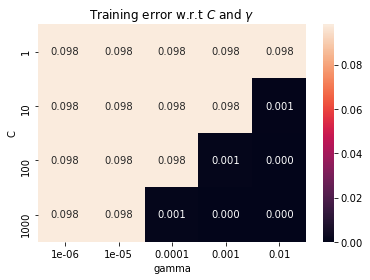

In [146]:
results = pd.DataFrame( search_results.cv_results_['params'] )

results['score'] = 1 - search_results.cv_results_['mean_test_score']

results = results.pivot('C','gamma','score')

sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [147]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(X_train,Y_train)
opt_test_score = 1 - opt_classifier.score(X_test,Y_test) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 

Test set error for optimum classifier(C=100,gamma=0.01): 0.000
